# Preparing Non-Uniform Time Data


## When the Data Has Date + Time (but no frequency)
Wide-form data is often explicitly designed for time series data. With wide-form data, we generally have time steps that are evenly spaced across columns (e.g. exactly 1 month between dates).
What if we had long-form data with values down to the second (more frequent than we would want to use).
We will talk through this more advanced scenario and prepare a dataset for future use.
### The Data
We will be working with crime data taken directly from the city of Baltimore via Baltimore's Open Data website: https://data.baltimorecity.gov/search?q=crime data
The exact data we want is "Part 1 Crime Data"
It is a large file and will take some time to download.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


In [2]:
df = pd.read_csv('/Users/danielbarella/Downloads/Part_1_Crime_Data.csv',low_memory=False)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558347 entries, 0 to 558346
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            558347 non-null  int64  
 1   CCNO             558347 non-null  object 
 2   CrimeDateTime    558347 non-null  object 
 3   CrimeCode        558347 non-null  object 
 4   Location         555578 non-null  object 
 5   Description      558347 non-null  object 
 6   Inside_Outside   468414 non-null  object 
 7   Weapon           124660 non-null  object 
 8   Post             544209 non-null  object 
 9   Gender           468092 non-null  object 
 10  Age              445941 non-null  float64
 11  Race             547174 non-null  object 
 12  Ethnicity        21185 non-null   object 
 13  District         544336 non-null  object 
 14  Neighborhood     544204 non-null  object 
 15  Latitude         557436 non-null  float64
 16  Longitude        557436 non-null  floa

,RowID,CCNO,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
0,1,23C07908,2023/03/25 00:12:00+00,3AF,900 W 36TH ST,ROBBERY,NaN,HANDGUN,531,F,29.0,WHITE,UNKNOWN,NORTHERN,Hampden,39.331215,-76.631309,"(39.331215,-76.631309)",NaN,1
1,2,23C07963,2023/03/25 08:05:00+00,6G,900 N CHARLES ST,LARCENY,NaN,NaN,124,NaN,NaN,NaN,NaN,CENTRAL,Mount Vernon,39.300620,-76.615933,"(39.30062,-76.615933)",NaN,1
2,3,23C08023,2023/03/25 11:30:00+00,3CO,200 HOLLIDAY ST,ROBBERY - COMMERCIAL,NaN,KNIFE_CUTTING_INSTRUMENT,111,NaN,NaN,NaN,NaN,CENTRAL,Downtown,39.291770,-76.610368,"(39.29177,-76.610368)",NaN,1
3,4,23C07955,2023/03/25 06:00:00+00,3CO,3700 BOSTON ST,ROBBERY - COMMERCIAL,NaN,PERSONAL_WEAPONS,231,NaN,NaN,NaN,NaN,SOUTHEAST,Canton Industrial Area,39.277064,-76.565284,"(39.277064,-76.565284)",NaN,1
4,5,23C08024,2023/03/25 12:00:00+00,3P,3100 GREENMOUNT AVE,ROBBERY,NaN,PERSONAL_WEAPONS,513,M,57.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHERN,Better Waverly,39.326719,-76.609335,"(39.326719,-76.609335)",NaN,1


- Here we have a MUCH messier dataset with much more information than we need.
- Let's examine 1 value from our Crime Date Time column.

In [3]:
test_date = df.loc[0, 'CrimeDateTime']
test_date

'2023/03/25 00:12:00+00'

As you can see, we now have not only the date ("2022/07/09") but also the exact time ("09:30:00") but then there is a "+00" at the end.
The "+XX" at the end of a date and time is actually the time zone.
By default, many datasets will use "UTC" time - which is "Coordinated Universal Time" which is represented by +00.
The value after the + indicates how many hours difference between UTC time and the current time zone.
If we convert it to a Pandas Timestamp, we can see additional info about the time zone.
Having "time zone-aware" timestamps can cause problems in some situations (mostly when modeling with time series).
We will revisit handling the time zone as it comes up.

In [4]:
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2023-03-25 00:12:00+0000', tz='UTC')

## Preparing the Date Time Index
Let's convert this to a Pandas datetime:

In [5]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1220-04-07 07:16:02 present at position 556023

We can see that we have some irrational values that are causing problems when we try to convert the entire column.
There is NO way that we have a crime report from the year 1202.
- We can add errors='coerce' to tell Pandas to replace any bad values with Not A Time (NaT) - which is what we call null values with time series.

In [6]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'],errors='coerce')


Ok, now let's check to see how many null values we created:

In [7]:
# how many null values did we create?
df['CrimeDateTime'].isna().sum()

4

It looks like it was only one value. Let's drop that value:

In [8]:
# drop the single erroneous time
df = df.dropna(subset=['CrimeDateTime'])
df['CrimeDateTime'].isna().sum()


0

In [9]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('CrimeDateTime')
df.head(3)

,RowID,CCNO,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2023-03-25 00:12:00+00:00,1,23C07908,3AF,900 W 36TH ST,ROBBERY,NaN,HANDGUN,531,F,29.0,WHITE,UNKNOWN,NORTHERN,Hampden,39.331215,-76.631309,"(39.331215,-76.631309)",NaN,1
2023-03-25 08:05:00+00:00,2,23C07963,6G,900 N CHARLES ST,LARCENY,NaN,NaN,124,NaN,NaN,NaN,NaN,CENTRAL,Mount Vernon,39.300620,-76.615933,"(39.30062,-76.615933)",NaN,1
2023-03-25 11:30:00+00:00,3,23C08023,3CO,200 HOLLIDAY ST,ROBBERY - COMMERCIAL,NaN,KNIFE_CUTTING_INSTRUMENT,111,NaN,NaN,NaN,NaN,CENTRAL,Downtown,39.291770,-76.610368,"(39.29177,-76.610368)",NaN,1


Note: we will need to sort_index to see the earliest and most recent time stamp


In [10]:
df = df.sort_index()
df.index

DatetimeIndex(['1920-06-18 01:30:00+00:00', '1922-06-22 13:00:00+00:00',
               '1963-10-30 00:00:00+00:00', '1966-01-01 01:00:00+00:00',
               '1969-07-20 21:00:00+00:00', '1970-06-15 00:01:00+00:00',
               '1973-07-01 23:00:00+00:00', '1975-06-01 00:00:00+00:00',
               '1976-09-01 01:01:00+00:00', '1977-05-01 00:01:00+00:00',
               ...
               '2023-03-25 20:10:00+00:00', '2023-03-25 20:10:00+00:00',
               '2023-03-25 20:33:00+00:00', '2023-03-25 20:51:00+00:00',
               '2023-03-25 21:00:00+00:00', '2023-03-25 21:31:00+00:00',
               '2023-03-25 21:35:17+00:00', '2023-03-25 22:30:00+00:00',
               '2023-03-25 23:20:00+00:00', '2023-03-25 23:20:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=558343, freq=None)

Wow! We can see some times going all the way back to the 1920's.
Let's get a quick visualization of how many crimes from each year we have.

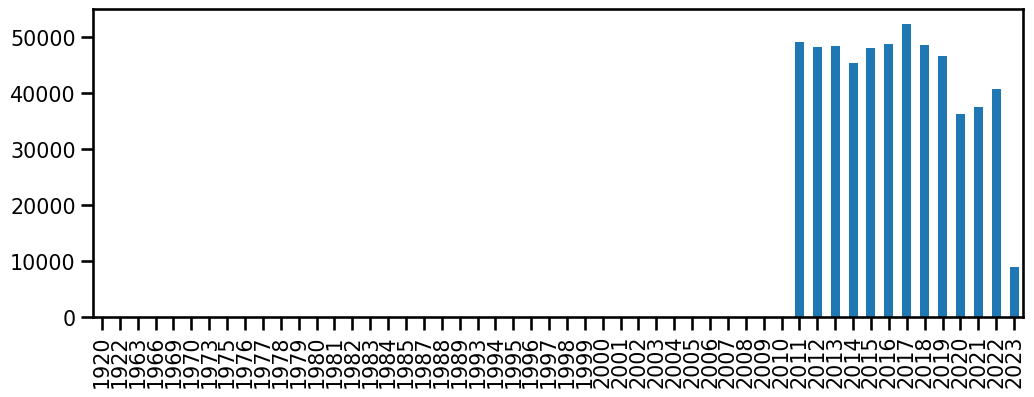

In [11]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');


Even though we have SOME crimes from the 1920's, it looks like the bulk of the data was really collected starting in 2011. Let's remove everything from before 2011.

In [12]:
## keeping 2011 to present
df = df.loc['2011':]
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:00:00+00:00',
               '2011-01-01 00:00:00+00:00', '2011-01-01 00:01:00+00:00',
               '2011-01-01 00:01:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:05:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               ...
               '2023-03-25 20:10:00+00:00', '2023-03-25 20:10:00+00:00',
               '2023-03-25 20:33:00+00:00', '2023-03-25 20:51:00+00:00',
               '2023-03-25 21:00:00+00:00', '2023-03-25 21:31:00+00:00',
               '2023-03-25 21:35:17+00:00', '2023-03-25 22:30:00+00:00',
               '2023-03-25 23:20:00+00:00', '2023-03-25 23:20:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=558184, freq=None)

## Inspecting the Data Format
Let's examine the features we have in the dataset and make our game plan for preparing our time series.
In the end, we want to have each row be 1 day, and we want each type of crime to have its own column, in which we have the # of that type of crime for that specific date.
We have a LOT of information about each crime, but we don't care about the majority of it, for time series purposes.
We can see that we have our CrimeDateTime column with the exact date and time that the crime was reported.
This will become our datetime index.
We can also see that we have a Description column with the name of the type of crime.
This will become the starting point for creating our individual columns for each type of crime.
Let's quickly examine what types of crimes and how many of each we have:

<AxesSubplot: >

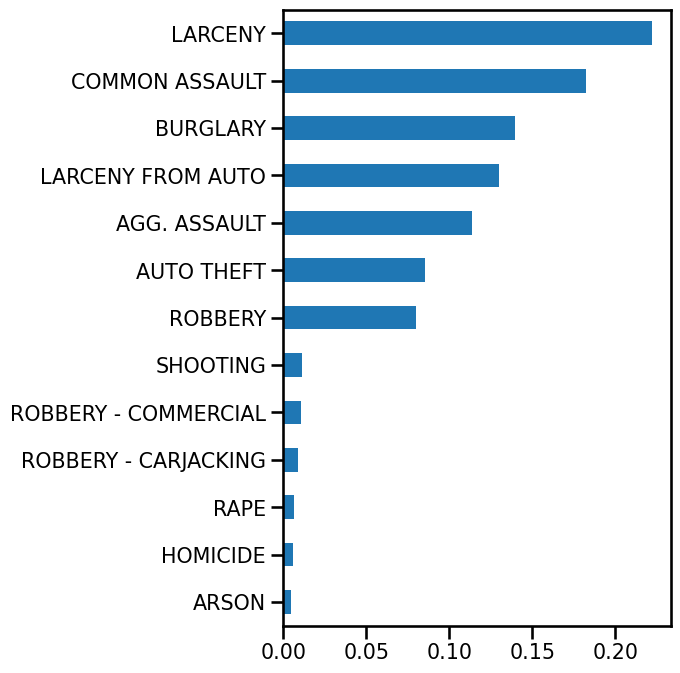

In [13]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))


Another way to visualize this is to take advantage of Pandas Styling.
See the Table Visualization section in Panda's documentation for more examples.
First, we need a DataFrame (not a Series), next we will use df.style., which will allow us to access several styling methods.
To convert our series to a dataframe, we can use the series .to_frame() method. We can provide a new column name for the series inside of .to_frame('New Name')
Once it's a DataFrame, we can now use the styling methods.
We want to use .style.bar to add a barplot INSIDE of our DataFrame.

In [14]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts


,Total # of Crimes
LARCENY,124116
COMMON ASSAULT,101679
BURGLARY,77786
LARCENY FROM AUTO,72654
AGG. ASSAULT,63494
AUTO THEFT,47512
ROBBERY,44649
SHOOTING,6137
ROBBERY - COMMERCIAL,5845
ROBBERY - CARJACKING,4790


In [15]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
LARCENY,124116
COMMON ASSAULT,101679
BURGLARY,77786
LARCENY FROM AUTO,72654
AGG. ASSAULT,63494
AUTO THEFT,47512
ROBBERY,44649
SHOOTING,6137
ROBBERY - COMMERCIAL,5845
ROBBERY - CARJACKING,4790


The perks of this visual is that it doesn't take up much space, still displays the data in the value_counts form we are used to, but then adds the nice visual summary with the bars.
We can see that we have 14 types of crimes to create columns for.
## Using Dictionaries and Loops to Prepare Time Series
Before we get started, we need to think about how we are going to get the total counts for each crime. - One option is to use the Total Incidents column, which already has a count of the crimes. - Another option would be to use .size as the aggregation method after our resample.
- .size() vs .count():
You may be wondering why we are not going to use .count when we want to count the # of crimes per day.
.count() will produce a 2-dimensional result with a count column for EVERY column.
.size() will just return the # of rows (a 1-dimensional result).
Additionally, the count method includes null values in the result, which will be fine for our purposes.
For our needs, .size() will be much cleaner.

In [16]:
## demoing groupby with .counts() vs .size()
df.groupby("Description").count().head()

,RowID,CCNO,CrimeCode,Location,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
Description,,,,,,,,,,,,,,,,,,
AGG. ASSAULT,63494,63494,63494,63124,50391,63310,61469,60571,58627,63263,2840,61494,61469,63389,63389,63494,50391,63494
ARSON,2487,2487,2487,2477,2173,2353,2404,1894,1483,2422,38,2404,2404,2480,2480,2487,2173,2487
AUTO THEFT,47512,47512,47512,47101,40985,25,45949,42556,41350,46494,2474,45972,45948,47406,47406,47512,40985,47512
BURGLARY,77786,77786,77786,77656,69634,84,77195,60181,54580,75694,1570,77196,77197,77735,77735,77786,69634,77786
COMMON ASSAULT,101679,101679,101679,101213,82619,7647,99060,97249,93144,101218,5317,99096,99058,101549,101549,101679,82619,101679


In [21]:
df.groupby("Description").size().head()


Description
AGG. ASSAULT       63494
ARSON               2487
AUTO THEFT         47512
BURGLARY           77786
COMMON ASSAULT    101679
dtype: int64

Notice that our .size() results match the "Total Incidents". It produced the same final answer, but with a much cleaner output.
## Our Plan
In order to create the separate columns for each crime, we will:

1. Get a list of all of the unique crime descriptions in the dataset
2. Create an empty dictionary where we will save our new time series crime columns.
3. Loop through the list of crimes and:
    - I. Save a temporary DataFrame where we filter for all of the rows of that crime type
    - II. Resample the temporary DataFrame as Daily data (crime counts) and save the .size()
    - III. Save the temporary DataFrame in the dictionary, using the crime description as the key.
4. Finally, we will convert our dictionaries to a DataFrame.
## Testing 1 crime first


In [18]:
## making our dictionary 
CRIMES = {}

In [26]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime

'ROBBERY'

In [27]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Description']==crime]
temp.head(3)

,RowID,CCNO,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 02:45:00+00:00,555514,11A00126,3AF,600 BROADWAY,ROBBERY,O,FIREARM,321,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,EASTERN,DUNBAR-BROADWAY,39.297273,-76.593184,"(39.2972728860117,-76.5931843569263)",STREET,1
2011-01-01 04:25:00+00:00,554952,11A00157,3B,2500 EDGECOMBE CIR N,ROBBERY,I,NaN,532,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHERN,PARKLANE,39.343019,-76.658456,"(39.3430188765295,-76.6584557566142)",APT/CONDO - OCCUPIED,1
2011-01-01 04:55:00+00:00,555231,11A00161,3B,1400 E FAYETTE ST,ROBBERY,O,NaN,212,M,55.0,BLACK_OR_AFRICAN_AMERICAN,NaN,SOUTHEAST,DUNBAR-BROADWAY,39.292961,-76.598507,"(39.2929608815761,-76.5985074435087)",STREET,1


In [28]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res

CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2023-03-21 00:00:00+00:00    10
2023-03-22 00:00:00+00:00    13
2023-03-23 00:00:00+00:00     3
2023-03-24 00:00:00+00:00     7
2023-03-25 00:00:00+00:00    14
Freq: D, Length: 4467, dtype: int64

In [29]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['ROBBERY - RESIDENCE', 'ROBBERY'])

Let's confirm our dictionary is working correctly. When we pull up the Robbery - Residence Key, we want daily totals of this type of crime.

In [31]:
CRIMES['ROBBERY']


CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2023-03-21 00:00:00+00:00    10
2023-03-22 00:00:00+00:00    13
2023-03-23 00:00:00+00:00     3
2023-03-24 00:00:00+00:00     7
2023-03-25 00:00:00+00:00    14
Freq: D, Length: 4467, dtype: int64

Now that we've successfully figured out and tested the workflow, let's construct our loop to do the same thing with each type of crime.
## Making Our Loop
First, we will create a list of all of the different types of crimes. We will want each of these to become a key in our new dictionary.

In [25]:
# 1. get list of  unique crime descriptions
crime_list = df['Description'].unique()
crime_list

array(['RAPE', 'LARCENY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
       'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'],
      dtype=object)

Now that you have the workflow, you can try creating a loop on your own. Here is an example of how the loop might look:

In [32]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['RAPE', 'LARCENY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL', 'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'])

Above we can see that we have a key for each type of robbery. Let's verify the values for one type. We will check values for shootings:

In [33]:
CRIMES['SHOOTING']

CrimeDateTime
2012-01-20 00:00:00+00:00     1
2012-01-21 00:00:00+00:00     0
2012-01-22 00:00:00+00:00     0
2012-01-23 00:00:00+00:00     0
2012-01-24 00:00:00+00:00     0
                             ..
2023-03-19 00:00:00+00:00     2
2023-03-20 00:00:00+00:00     1
2023-03-21 00:00:00+00:00     4
2023-03-22 00:00:00+00:00     1
2023-03-23 00:00:00+00:00    11
Freq: D, Length: 4081, dtype: int64

### Convert Dictionary to DataFrame

Since we saved only 1 column per crime (and we, therefore, have a pandas Series) we can simply use pd.DataFrame(CRIMES).

In [34]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,RAPE,LARCENY,LARCENY FROM AUTO,AGG. ASSAULT,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,5,39,27,28,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02 00:00:00+00:00,2,20,20,6,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03 00:00:00+00:00,1,19,16,13,21,15,7,9,1,0.0,NaN,NaN,NaN
2011-01-04 00:00:00+00:00,1,29,12,11,12,29,10,4,0,0.0,NaN,NaN,NaN
2011-01-05 00:00:00+00:00,0,30,14,9,28,26,10,6,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00+00:00,1,30,10,11,7,21,22,10,0,0.0,3.0,2.0,4.0
2023-03-22 00:00:00+00:00,0,28,10,15,9,30,17,13,2,0.0,2.0,2.0,1.0
2023-03-23 00:00:00+00:00,0,31,9,12,10,33,10,3,3,0.0,0.0,3.0,11.0


And there we go! We have created our time series of daily crime counts!



In [38]:
import os

# create directory if it does not exist
if not os.path.exists("../Data/Baltimore"):
    os.makedirs("../Data/Baltimore")

In [39]:
## saving to disk for later
crimes_df.to_csv("../Data/Baltimore/baltimore_crime_counts_2023.csv")